# 잠재 의미 분석(Latent Semantic Analysis, LSA)
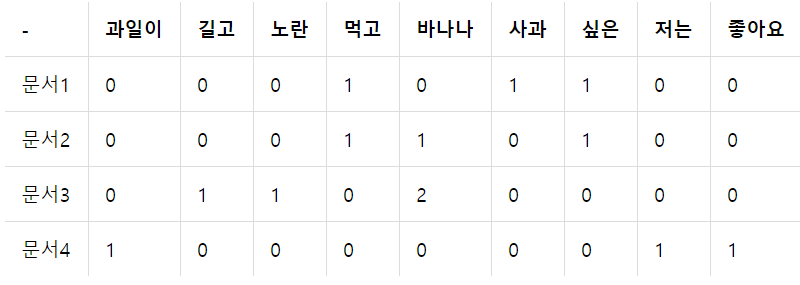

In [1]:
# 위의 DTM을 array로 생성
import numpy as np
A=np.array([[0,0,0,1,0,1,1,0,0],[0,0,0,1,1,0,1,0,0],[0,1,1,0,2,0,0,0,0],[1,0,0,0,0,0,0,1,1]])
np.shape(A)

(4, 9)

## Full SVD 수행
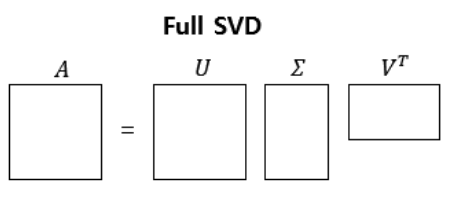
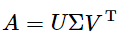
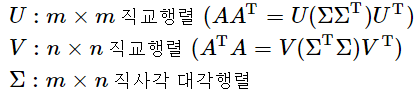

In [9]:
# full SVD 수행
U, s, VT = np.linalg.svd(A, full_matrices = True)

print('U : m x m 직교행렬')
print()
print(U.round(2))
print(np.shape(U))
print()

print('V : n x n 직교행렬')
print()
print(VT.round(2))
print(np.shape(VT))
print()

print('Σ : m x n 직사각 대각행렬')
print()
S = np.zeros((4, 9)) # 대각 행렬의 크기인 4 x 9의 임의의 행렬 생성
S[:4, :4] = np.diag(s) # 특이값을 대각행렬에 삽입
print(S.round(2))
print(np.shape(S))

U : m x m 직교행렬

[[ 0.24  0.75  0.    0.62]
 [ 0.51  0.44 -0.   -0.74]
 [ 0.83 -0.49 -0.    0.27]
 [ 0.   -0.    1.   -0.  ]]
(4, 4)

V : n x n 직교행렬

[[ 0.    0.31  0.31  0.28  0.8   0.09  0.28  0.    0.  ]
 [ 0.   -0.24 -0.24  0.58 -0.26  0.37  0.58 -0.   -0.  ]
 [ 0.58 -0.    0.    0.   -0.    0.   -0.    0.58  0.58]
 [-0.    0.35  0.35 -0.16 -0.25  0.8  -0.16  0.    0.  ]
 [-0.   -0.78 -0.01 -0.2   0.4   0.4  -0.2   0.    0.  ]
 [-0.29  0.31 -0.78 -0.24  0.23  0.23  0.01  0.14  0.14]
 [-0.29 -0.1   0.26 -0.59 -0.08 -0.08  0.66  0.14  0.14]
 [-0.5  -0.06  0.15  0.24 -0.05 -0.05 -0.19  0.75 -0.25]
 [-0.5  -0.06  0.15  0.24 -0.05 -0.05 -0.19 -0.25  0.75]]
(9, 9)

Σ : m x n 직사각 대각행렬

[[2.69 0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   2.05 0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   1.73 0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.77 0.   0.   0.   0.   0.  ]]
(4, 9)


In [10]:
# U x S x VT 를 통해 기존 행렬 A가 나오는지 확인
np.allclose(A, np.dot(np.dot(U,S), VT).round(2))

True

## Truncated SVD 수행
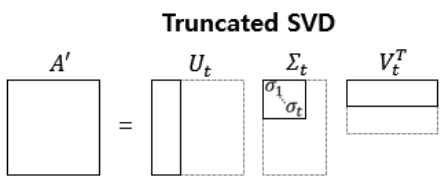
* t=2로 설정 (행렬의 상위 2개만 남기고 제거)

In [11]:
# 대각 행렬 S 내의 특이값 중에서 상위 2개만 남기고 제거
S=S[:2,:2]
print(S.round(2))

[[2.69 0.  ]
 [0.   2.05]]


In [12]:
# 직교 행렬 U에 대해서도 2개의 열만 남기고 제거
U=U[:,:2]
print(U.round(2))

[[ 0.24  0.75]
 [ 0.51  0.44]
 [ 0.83 -0.49]
 [ 0.   -0.  ]]


In [13]:
# 행렬 V의 전치 행렬인 VT에 대해서 2개의 행만 남기고 제거
#  V관점에서는 2개의 열만 남기고 제거한 것이 됨
VT=VT[:2,:]
print(VT.round(2))

[[ 0.    0.31  0.31  0.28  0.8   0.09  0.28  0.    0.  ]
 [ 0.   -0.24 -0.24  0.58 -0.26  0.37  0.58 -0.   -0.  ]]


In [14]:
# # U x S x VT 를 통해 나온 행렬 A_prime과 A를 비교
A_prime=np.dot(np.dot(U,S), VT)
print(A)
print(A_prime.round(2))

[[0 0 0 1 0 1 1 0 0]
 [0 0 0 1 1 0 1 0 0]
 [0 1 1 0 2 0 0 0 0]
 [1 0 0 0 0 0 0 1 1]]
[[ 0.   -0.17 -0.17  1.08  0.12  0.62  1.08 -0.   -0.  ]
 [ 0.    0.2   0.2   0.91  0.86  0.45  0.91  0.    0.  ]
 [ 0.    0.93  0.93  0.03  2.05 -0.17  0.03  0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    0.  ]]


* 대체적으로 기존에 0인 값들은 0에 가가운 값이 나오고, 1인 값들은 1에 가까운 값이 나오는 것 확인

**축소된 U의 의미**
* 4 × 2의 크기를 가지는데, 이는 잘 생각해보면 문서의 개수 × 토픽의 수 t의 크기
* 단어개수는 유지 x 문서개수는 유지 o -> 4개의 문서를 각각 2개의 값으로 표현

**축소된 VT의 의미**
* 축소된 VT는 2 × 9의 크기를 가지는데, 이는 잘 생각해보면 토픽의 수 t × 단어의 개수의 크기
* 각 열은 9개의 단어의 잠재 의미를 표현하기 위해 수치화된 각각의 단어 벡터

## Twenty Newsgroups 데이터로 토픽 모델링
* 20개의 다른 주제를 가진 뉴스그룹 데이터
* LSA를 사용해서 문서의 수를 원하는 토픽의 수로 압축한 뒤에 각 토픽당 가장 중요한 단어 5개를 출력

### 1) 데이터 확인

In [15]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))
documents = dataset.data
len(documents)

11314

In [16]:
# 첫번째 훈련용 샘플을 출력
documents[1]

"\n\n\n\n\n\n\nYeah, do you expect people to read the FAQ, etc. and actually accept hard\natheism?  No, you need a little leap of faith, Jimmy.  Your logic runs out\nof steam!\n\n\n\n\n\n\n\nJim,\n\nSorry I can't pity you, Jim.  And I'm sorry that you have these feelings of\ndenial about the faith you need to get by.  Oh well, just pretend that it will\nall end happily ever after anyway.  Maybe if you start a new newsgroup,\nalt.atheist.hard, you won't be bummin' so much?\n\n\n\n\n\n\nBye-Bye, Big Jim.  Don't forget your Flintstone's Chewables!  :) \n--\nBake Timmons, III"

In [17]:
# 20개의 카테고리 종류 출력
print(dataset.target_names)

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


### 2) 전처리
* 알파벳을 제외한 구두점, 숫자, 특수 문자를 제거 (정규 표현식 이용)
* 길이가 짧은 단어 제거
* 모든 알파벳을 소문자로 변환
* 토큰화 후 불용어 제거

In [18]:
news_df = pd.DataFrame({'document':documents})
# 특수 문자 제거
news_df['clean_doc'] = news_df['document'].str.replace("[^a-zA-Z]", " ")
# 길이가 3이하인 단어는 제거 (길이가 짧은 단어 제거)
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
# 전체 단어에 대한 소문자 변환
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: x.lower())

In [19]:
news_df['clean_doc'][1]

'yeah expect people read actually accept hard atheism need little leap faith jimmy your logic runs steam sorry pity sorry that have these feelings denial about faith need well just pretend that will happily ever after anyway maybe start newsgroup atheist hard bummin much forget your flintstone chewables bake timmons'

In [21]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\JIN\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [22]:
from nltk.corpus import stopwords
# NLTK로부터 불용어 로드
stop_words = stopwords.words('english') 
tokenized_doc = news_df['clean_doc'].apply(lambda x: x.split()) # 토큰화
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words]) # 불용어 제거

In [23]:
print(tokenized_doc[1])

['yeah', 'expect', 'people', 'read', 'actually', 'accept', 'hard', 'atheism', 'need', 'little', 'leap', 'faith', 'jimmy', 'logic', 'runs', 'steam', 'sorry', 'pity', 'sorry', 'feelings', 'denial', 'faith', 'need', 'well', 'pretend', 'happily', 'ever', 'anyway', 'maybe', 'start', 'newsgroup', 'atheist', 'hard', 'bummin', 'much', 'forget', 'flintstone', 'chewables', 'bake', 'timmons']


### 3) TF-IDF 행렬 생성
* TF-IDF는 토큰화 되지 않은 텍스트 데이터를 입력으로 사용
* 따라서 불용어 제거 후 역토큰화를 통해 tf-idf수행

In [24]:
# 역토큰화 (토큰화 작업을 역으로 되돌림)
detokenized_doc = []
for i in range(len(news_df)):
    t = ' '.join(tokenized_doc[i])
    detokenized_doc.append(t)

news_df['clean_doc'] = detokenized_doc

In [25]:
news_df['clean_doc'][1]

'yeah expect people read actually accept hard atheism need little leap faith jimmy logic runs steam sorry pity sorry feelings denial faith need well pretend happily ever anyway maybe start newsgroup atheist hard bummin much forget flintstone chewables bake timmons'

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', 
max_features= 1000, # 상위 1,000개의 단어를 보존 
max_df = 0.5, 
smooth_idf=True)

X = vectorizer.fit_transform(news_df['clean_doc'])
X.shape # TF-IDF 행렬의 크기 확인

(11314, 1000)

### 4) 토픽 모델링(Topic Modeling)
* SVD(Truncated SVD)를 사용
* 20개의 토픽을 가졌다고 가정
* 토픽의 숫자는 n_components의 파라미터로 지정

In [27]:
from sklearn.decomposition import TruncatedSVD
svd_model = TruncatedSVD(n_components=20, algorithm='randomized', n_iter=100, random_state=122)
svd_model.fit(X)
len(svd_model.components_)

20

In [29]:
np.shape(svd_model.components_)

(20, 1000)

In [28]:
terms = vectorizer.get_feature_names() # 단어 집합. 1,000개의 단어가 저장됨.

def get_topics(components, feature_names, n=5):
    for idx, topic in enumerate(components):
        print("Topic %d:" % (idx+1), [(feature_names[i], topic[i].round(5)) for i in topic.argsort()[:-n - 1:-1]])
get_topics(svd_model.components_,terms)

Topic 1: [('like', 0.21386), ('know', 0.20046), ('people', 0.19293), ('think', 0.17805), ('good', 0.15128)]
Topic 2: [('thanks', 0.32888), ('windows', 0.29088), ('card', 0.18069), ('drive', 0.17455), ('mail', 0.15111)]
Topic 3: [('game', 0.37064), ('team', 0.32443), ('year', 0.28154), ('games', 0.2537), ('season', 0.18419)]
Topic 4: [('drive', 0.53324), ('scsi', 0.20165), ('hard', 0.15628), ('disk', 0.15578), ('card', 0.13994)]
Topic 5: [('windows', 0.40399), ('file', 0.25436), ('window', 0.18044), ('files', 0.16078), ('program', 0.13894)]
Topic 6: [('chip', 0.16114), ('government', 0.16009), ('mail', 0.15625), ('space', 0.1507), ('information', 0.13562)]
Topic 7: [('like', 0.67086), ('bike', 0.14236), ('chip', 0.11169), ('know', 0.11139), ('sounds', 0.10371)]
Topic 8: [('card', 0.46633), ('video', 0.22137), ('sale', 0.21266), ('monitor', 0.15463), ('offer', 0.14643)]
Topic 9: [('know', 0.46047), ('card', 0.33605), ('chip', 0.17558), ('government', 0.1522), ('video', 0.14356)]
Topic 10